In [1]:
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# IMPORTING THE CALIFORNIA HOUSING DATASET FROM SKLEARN
from sklearn.datasets import fetch_california_housing
# THIS DATA COMES IN DICTIOARY FORMAT

In [3]:
housing = fetch_california_housing()

In [4]:
type(housing)

sklearn.utils.Bunch

In [5]:
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [6]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [7]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [8]:
housing_new = pd.DataFrame(housing.data,columns = housing.feature_names)

In [9]:
housing_new['Target']= housing.target

In [10]:
type(housing_new)

pandas.core.frame.DataFrame

In [11]:
# NOW THE HOUSING DATA HAS BEEN CONVERTED INTO DATAFRAME 

In [12]:
# CHECKING THE SHAPE AND HEAD OF THE DATA
housing_new.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
housing_new.shape

(20640, 9)

In [14]:
# SUMMARY OF THE DATA
housing_new.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
housing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
Target        20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


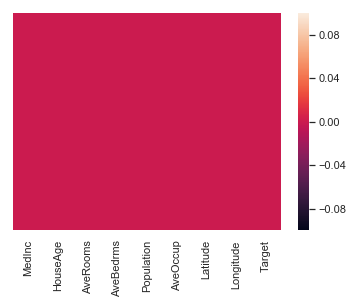

In [16]:
# CHECKING FOR THE NULL VALUES IN THE DATA AND PLOTTING THE HEATMAP
housing_new.isnull().sum().any()
sns.set(style='darkgrid')
sns.heatmap(housing_new.isnull(),yticklabels=False)

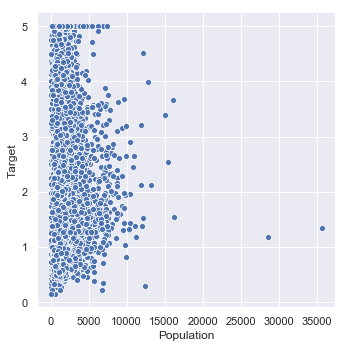

In [17]:
# CHECKING THE RELATION BETWEEN THE TARGET VARIABLE AND FEATURE VARIABLES OF THE DATA
sns.relplot(x='Population',y='Target',data=housing_new)

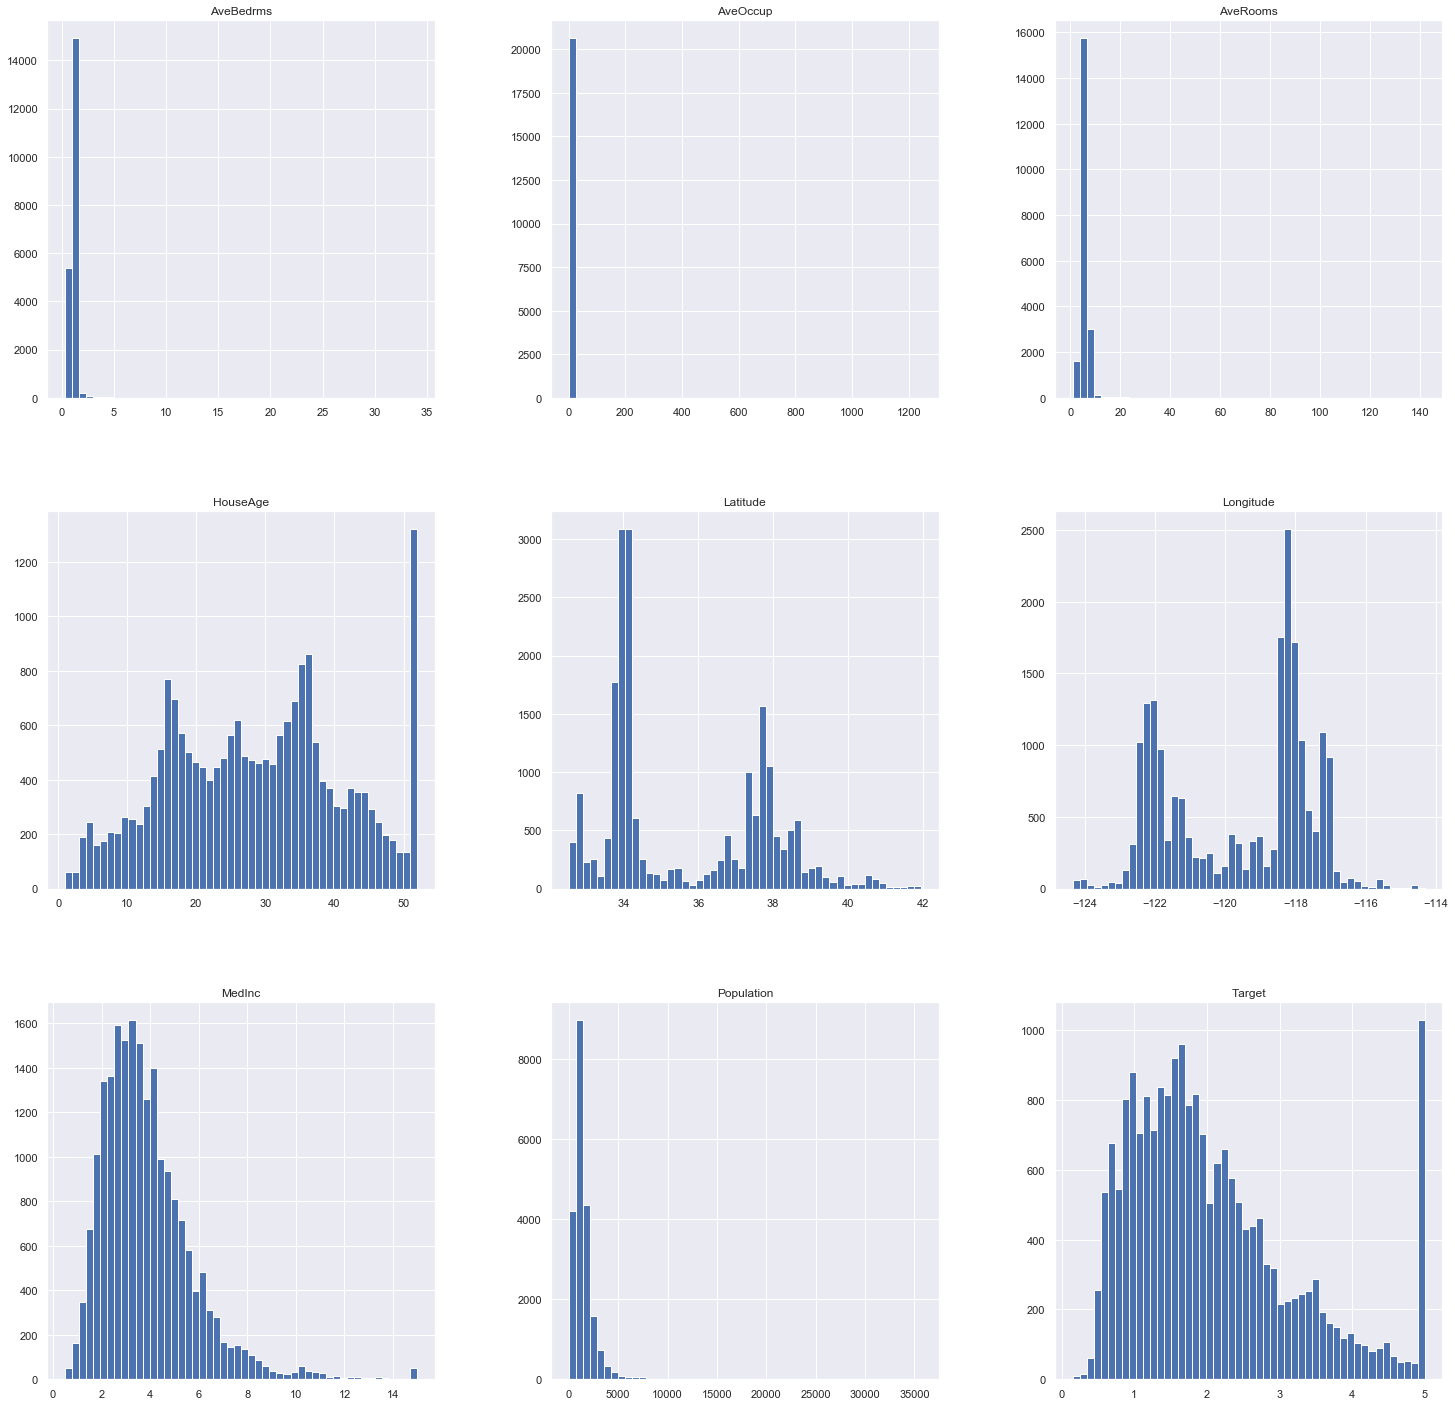

In [18]:
housing_new.hist(figsize=(25,25),bins=50);

<Figure size 1080x864 with 0 Axes>

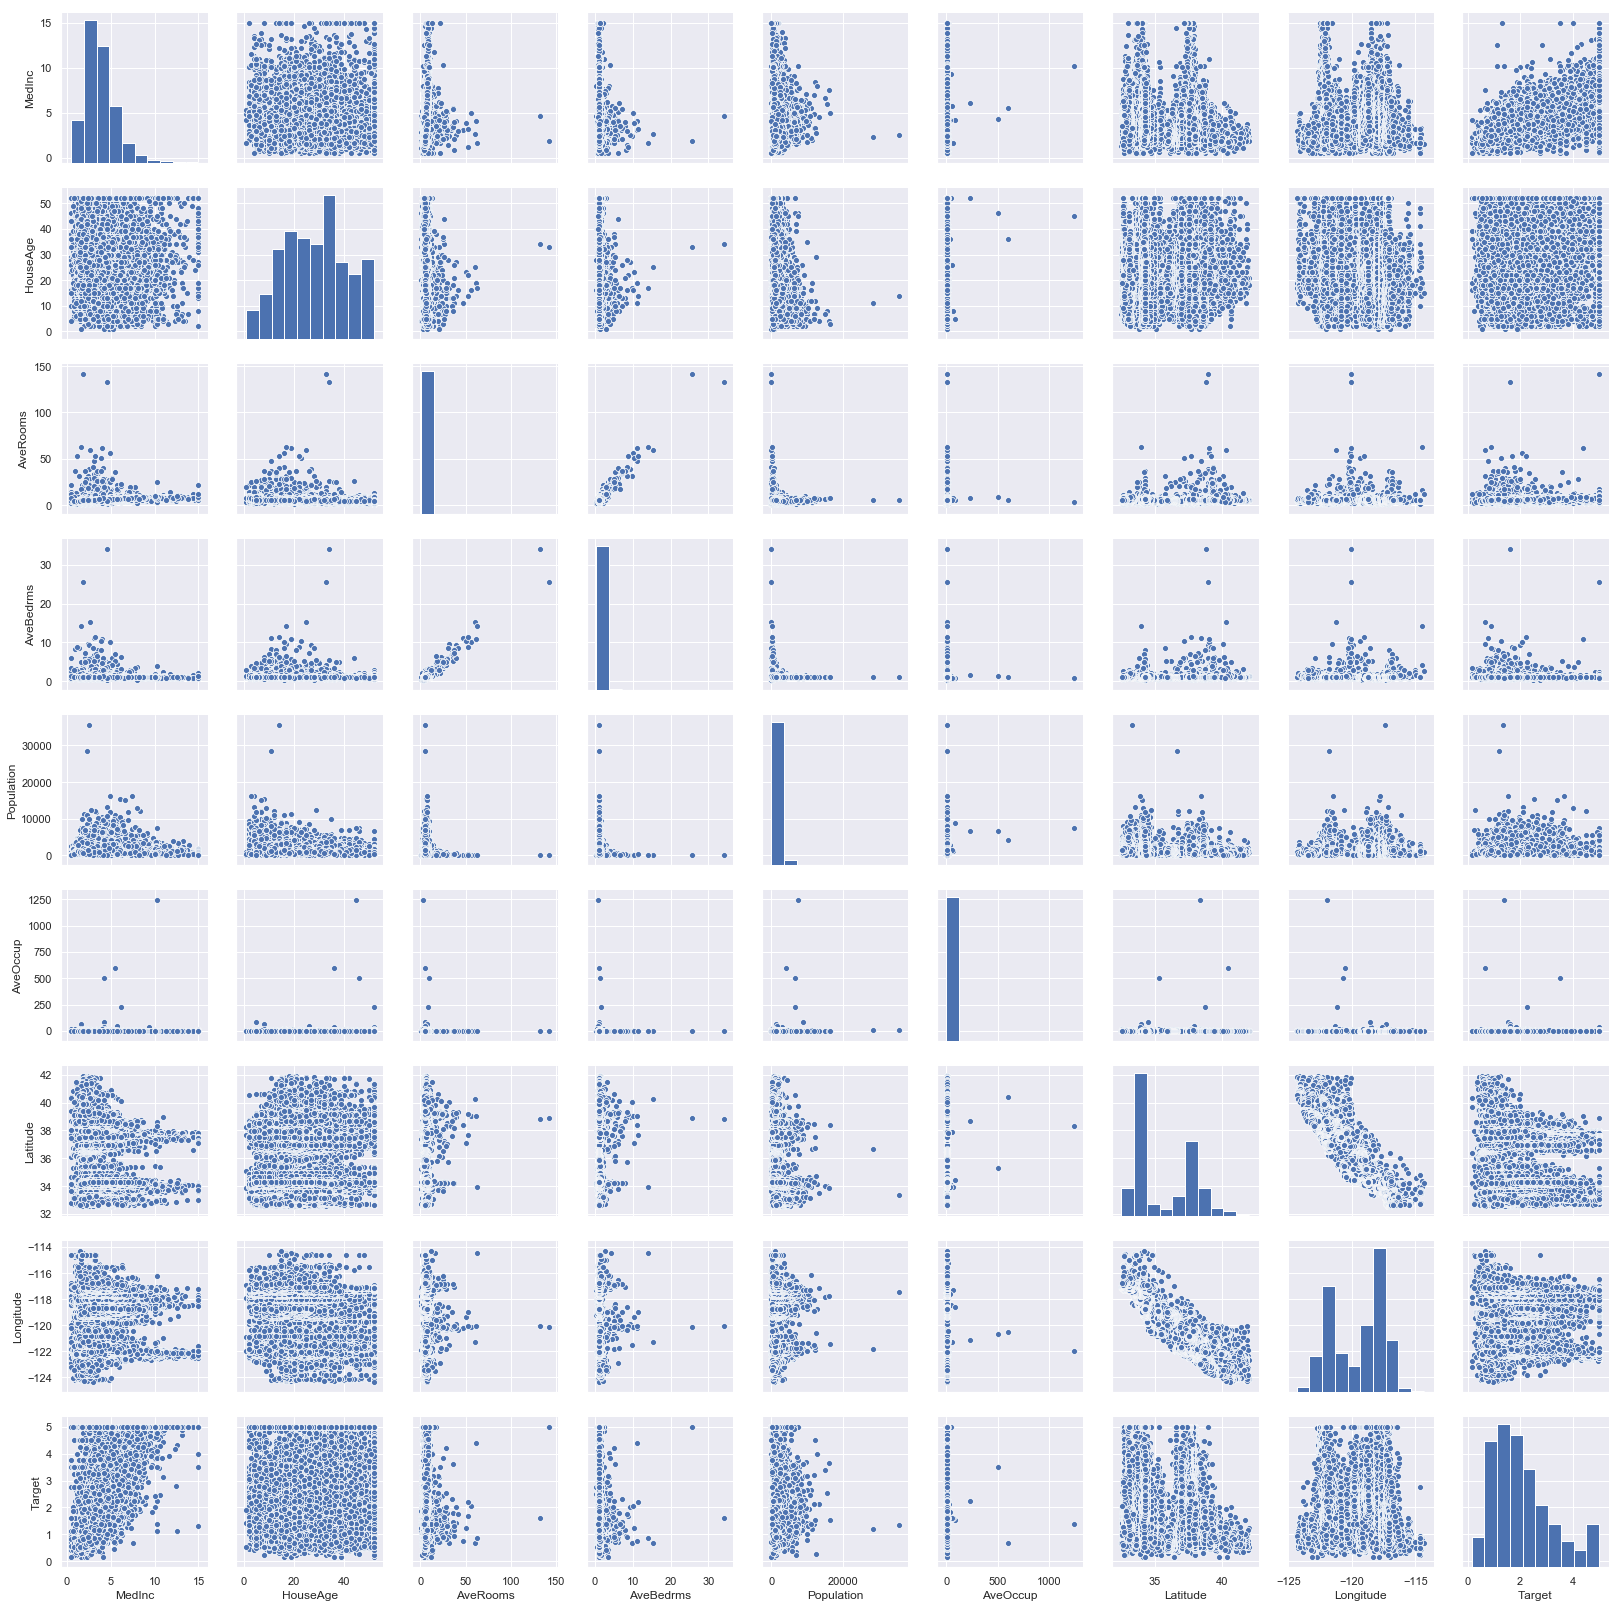

In [19]:
# PAIRPLOT
plt.figure(figsize=(15,12))
sns.pairplot(housing_new)

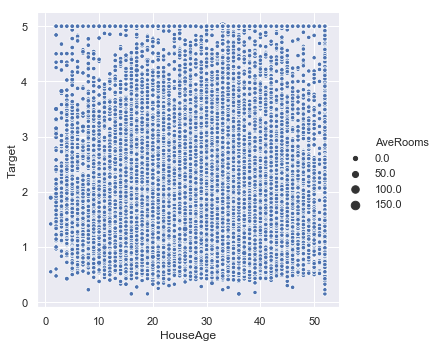

In [20]:
# RELATION PLOT 
sns.relplot(x='HouseAge',y='Target',size='AveRooms',data=housing_new)

In [21]:
# AS SUCH NO RELATION IS THERE BETWEEN HOUSEAGE AND HOUSE PRICE PREDICTION

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

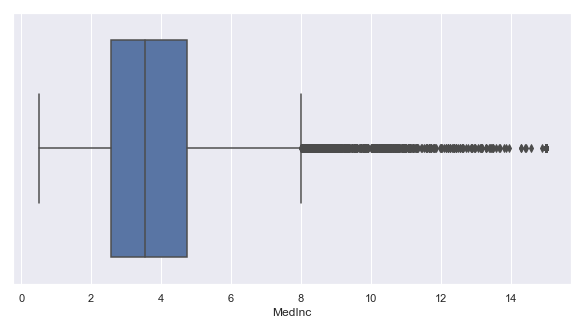

In [22]:
# boxplot on total_bedrooms
plt.figure(figsize=(10,5))
sns.boxplot(x='MedInc',data=housing_new)
plt.plot

In [23]:
# THIS FEATURE CONTAINS OUTLIERS

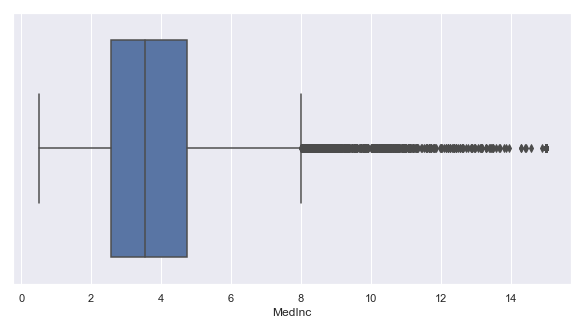

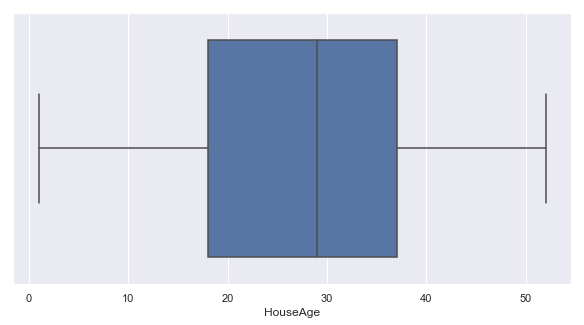

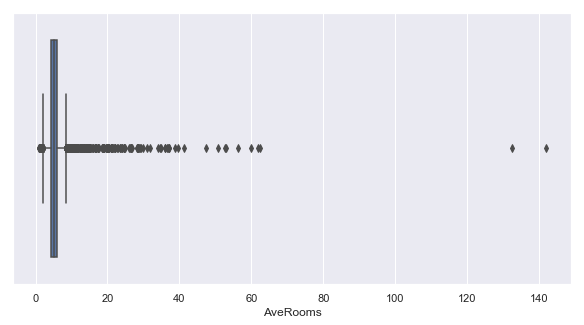

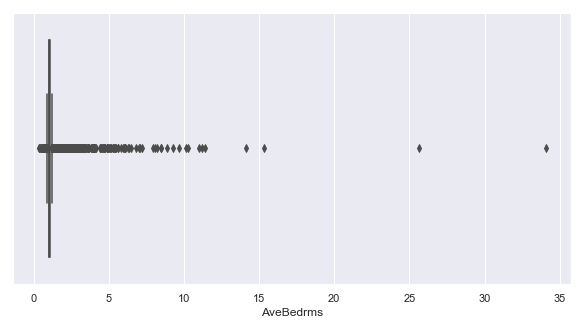

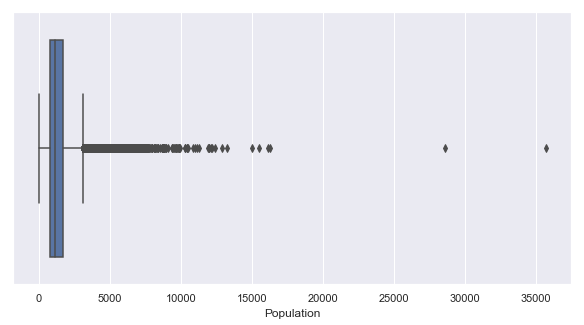

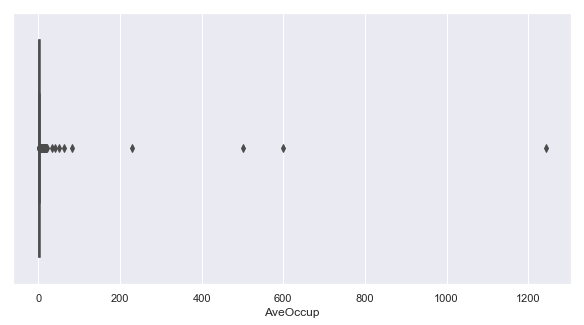

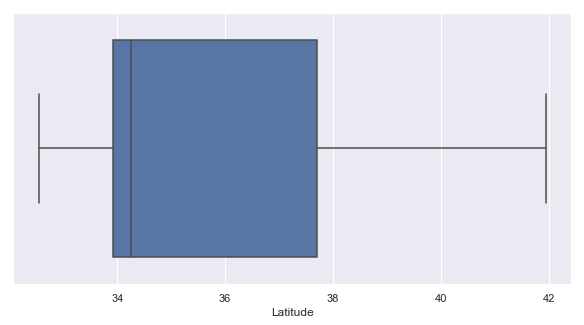

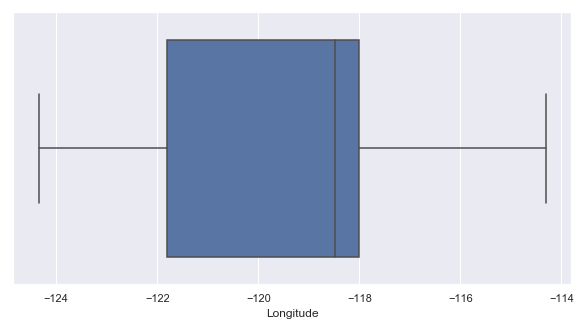

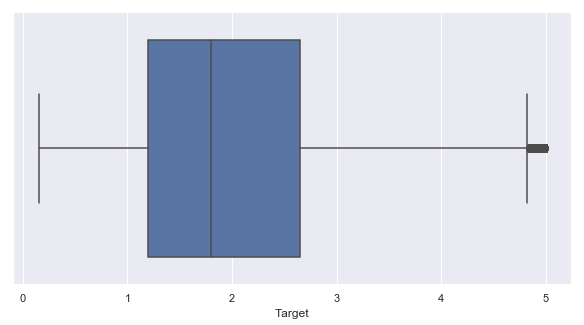

In [24]:
for i in housing_new.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=housing_new[i],data=housing_new)
    plt.plot

In [25]:
# IT IS CLEAR THAT FEATURES EXCEPT 'HouseAge', 'Latitude' ,'Longitude' HAVE OUTLIERS
# REMOVING OUTLIERS THROUGH ZSCORE
# IMPORTING THE LIBRARY

In [26]:
from scipy.stats import zscore
z = np.abs(zscore(housing_new))

In [27]:
# THRESHOLD = 3
print(np.where(z>3))

(array([  131,   283,   409,   510,   511,   512,   514,   570,   576,
         710,   780,   799,   864,   865,   867,   869,   871,   922,
         923,   977,   985,   986,   995,  1010,  1021,  1024,  1024,
        1039,  1060,  1086,  1102,  1102,  1233,  1233,  1234,  1234,
        1235,  1235,  1238,  1238,  1239,  1239,  1240,  1240,  1541,
        1560,  1561,  1563,  1564,  1566,  1566,  1574,  1582,  1583,
        1586,  1591,  1593,  1602,  1617,  1621,  1636,  1637,  1642,
        1644,  1645,  1646,  1700,  1867,  1867,  1872,  1872,  1879,
        1889,  1889,  1910,  1910,  1911,  1911,  1912,  1912,  1913,
        1913,  1914,  1914,  1925,  1926,  1926,  1930,  1978,  1978,
        1979,  1979,  2025,  2119,  2213,  2294,  2311,  2392,  2392,
        2395,  2395,  2396,  2396,  2397,  2397,  2398,  2398,  2511,
        2511,  2776,  2826,  2963,  2969,  2975,  2978,  2999,  3004,
        3086,  3086,  3167,  3177,  3258,  3258,  3292,  3334,  3350,
        3350,  3364

In [28]:
housing_new = housing_new[(z<3).all(axis=1)]

In [29]:
# REMOVED OUTLIERS THROUGH ZSCORE

In [30]:
# CORRELATION BETWEEN THE FEATURES OF THE DATA
# DROPPING THE TARGET VARIABLE
housing_ = housing_new.drop('Target',axis=1)

In [31]:
# CORRELATION TABULAR FORM
housing_.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.146407,0.628754,-0.181716,0.005272,-0.080458,-0.080542,-0.016568
HouseAge,-0.146407,1.000000,-0.228214,-0.126165,-0.290178,0.000554,0.007983,-0.101065
AveRooms,0.628754,-0.228214,1.000000,0.319883,-0.081712,-0.050434,0.133561,-0.076670
AveBedrms,-0.181716,-0.126165,0.319883,1.000000,-0.048011,-0.083328,0.069815,0.010892
Population,0.005272,-0.290178,-0.081712,-0.048011,1.000000,0.181155,-0.118762,0.106353
AveOccup,-0.080458,0.000554,-0.050434,-0.083328,0.181155,1.000000,-0.142506,0.151639
Latitude,-0.080542,0.007983,0.133561,0.069815,-0.118762,-0.142506,1.000000,-0.927528
Longitude,-0.016568,-0.101065,-0.076670,0.010892,0.106353,0.151639,-0.927528,1.000000


In [32]:
corr_matrix = housing_.corr().abs()

In [33]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape).astype(bool)))
upper

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.0,0.146407,0.628754,0.181716,0.005272,0.080458,0.080542,0.016568
HouseAge,NaN,1.000000,0.228214,0.126165,0.290178,0.000554,0.007983,0.101065
AveRooms,NaN,NaN,1.000000,0.319883,0.081712,0.050434,0.133561,0.076670
AveBedrms,NaN,NaN,NaN,1.000000,0.048011,0.083328,0.069815,0.010892
Population,NaN,NaN,NaN,NaN,1.000000,0.181155,0.118762,0.106353
AveOccup,NaN,NaN,NaN,NaN,NaN,1.000000,0.142506,0.151639
Latitude,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.927528
Longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [34]:
# CHOOSING THE THRESHOLD = 0.6
to_drop = [column for column in upper.columns if any (upper[column]<0.6)]
to_drop

['HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [35]:
# MedInc HAS HIGH CORRELATION . SO CAN DROP THAT FEATURE
# HIGHLY RELATED FEATURES LEADS TO OVERFIT THE MODEL

In [36]:
housing_new = housing_new.drop('MedInc',axis=1)

In [37]:
housing_new.head()

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


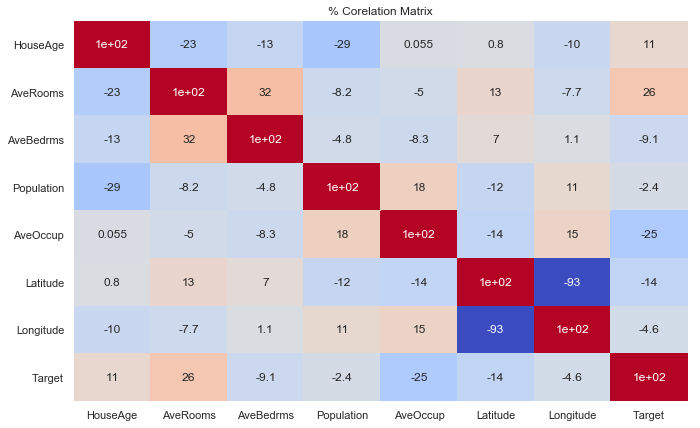

In [38]:
#corelation matrix
plt.figure(figsize=(11,7))
sns.heatmap(cbar=False,annot=True,data=housing_new.corr()*100,cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

In [39]:
# DIVIDING THE DATA INTO INDEPENDENT AND DEPENDENT VARIABLES
x = housing_new.drop('Target',axis=1)
y = housing_new['Target']

In [40]:
# SPLITTING THE DATASET 
# IMPORTING THE LIBRARY

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [43]:
# SCALING THE DATA INTO STANDARDIZED FORM THROUGH STANDARD SCALER
# IMPORTING THE LIBRARY
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [44]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [45]:
print('standard deviation of the data {}'. format(x_train.std()))

standard deviation of the data 1.0


In [46]:
# MODELS
# IMPORTING THE LIBRARIES
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import  statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [47]:
rf = RandomForestRegressor(n_estimators=50,max_depth=3,n_jobs=-1)
lr = LinearRegression()
dtc = DecisionTreeRegressor(max_depth=3)

In [48]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.4439019543600965

Text(0.5, 1.0, 'coeff graph')

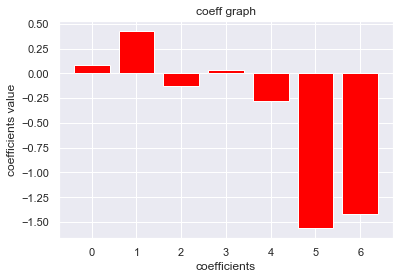

In [49]:
plt.bar(np.arange(len(lr.coef_)),lr.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

In [50]:
score = cross_val_score(lr,x,y,cv=7,scoring='neg_mean_squared_error')
score

array([-0.65727228, -1.07257918, -0.49596853, -0.8595151 , -0.54968836,
       -1.06388266, -0.54592965])

In [51]:
score.mean()

-0.749262250627171

In [52]:
score.std()

0.22974186605276217

In [53]:
score = cross_val_score(rf,X=x_train,y=y_train,cv=7,scoring = 'r2')

In [54]:
score.mean()

0.3242934967440943

In [55]:
score = cross_val_score(dtc,X=x_train,y=y_train,cv=7,scoring = 'r2')

In [56]:
score.mean()

0.2831886470626395

In [57]:
# APPLYING THE KNN MODEL
# IMPORTING THE LIBRARY
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(n_neighbors=11).fit(x_train,y_train)
kn.score(x_train,y_train)

0.666525372502162

In [58]:
pred = kn.predict(x_test)
print('r2 score of the model:',r2_score(pred,y_test))
print('mean absoulte error of the model :',mean_absolute_error(pred,y_test))
print('mean squared error of the model :',mean_squared_error(pred,y_test))

r2 score of the model: 0.23280830346104064
mean absoulte error of the model : 0.513349685373558
mean squared error of the model : 0.49177307795073705


In [59]:
#Gradient descent boosting
from sklearn.ensemble import GradientBoostingRegressor
clf=GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1,loss="ls")
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

In [60]:
clf.score(x_test, y_test)*100

81.48786057555175

In [61]:
print('mean absoulte error of the model :',mean_absolute_error(pred,y_test))
print('mean squared error of the model :',mean_squared_error(pred,y_test))

mean absoulte error of the model : 0.3161793396934467
mean squared error of the model : 0.22599368570439562


In [62]:
# FROM ALL THE MODELS GRADIENT BOOSTING MODEL HAS ACHIEVED MAXIMUM ACCURACY OF 81.4% . 
# SAVING THE GRADIENT BOOSTING MODEL
import pickle
filehandler = open("finalmodel_GB.obj","wb")
# saving the model in pickel string
saved_rf_model = pickle.dump(clf,filehandler)
filehandler.close()